#                         NBA Player Analytics EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("C:/Users/Lukas Buteliauskas/Desktop/Springboard Projects/Capstone Project 1 - NBA Analytics/2. Data Wrangling/Player Data Clean.csv", "r") as player_data_file:
    player_data_df=pd.read_csv(player_data_file)

player_data_df=player_data_df.iloc[:,1:] # Getting rid of read in index column.
player_data_df["Year in League"]=player_data_df["Year in League"].astype("int")
player_data_df["Season"]=player_data_df["Season"].str.slice(0,4) # Keeping only the year
# Setting variable types
for column in ["Country or State", "Tm", "US or EU"]: 
    player_data_df[column]=player_data_df[column].astype("category")

In this project we aim to find out how groups of NBA centers from the US and EU differ from one another. What are the advantages or disadvantages between groups, and is there even a difference at all? After that we will build a ML model that will predict the most common 'per game' statistics (Points per Game, Assists, Rebounds etc). Before that though, let's try and answers some of the questions posed above. 

## Data Overview

In [2]:
print(player_data_df["US or EU"].value_counts())

US    3804
EU     592
Name: US or EU, dtype: int64


Perhaps not so surprisingly the majority of the players are US based, however I expected the proportion to be even smaller. Let's see how this has evolved throughout the years. To keep things consistent in our graphs we will use Red for US data and Blue for EU data. In the cases where the colors hide certain details we will use lighter or darker shades of Red or Blue respectively.

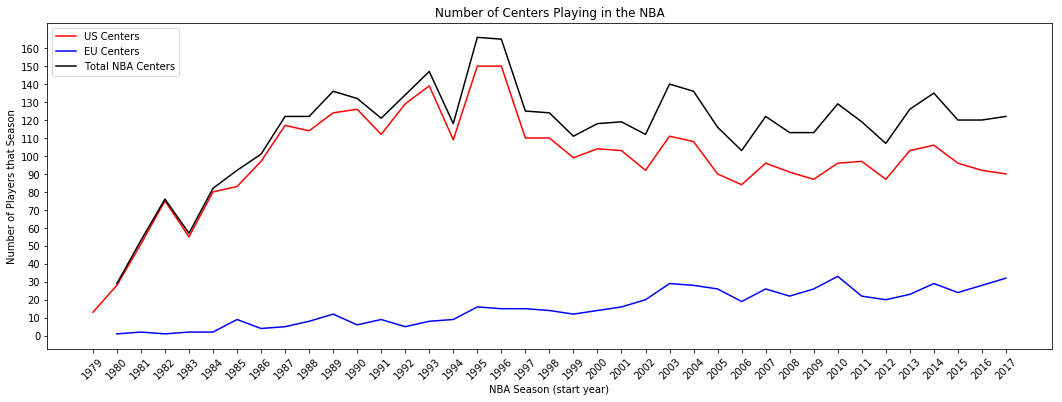

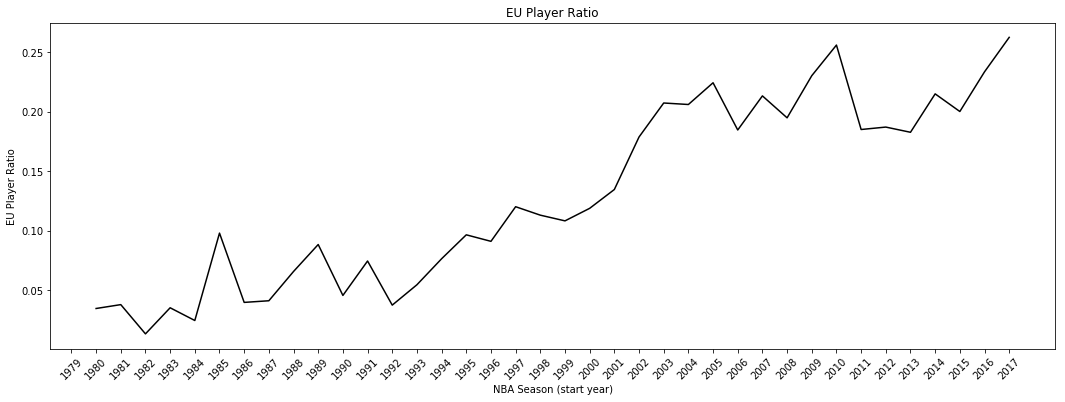

In [3]:
us_player_count=player_data_df[player_data_df["US or EU"]=="US"]["Season"].value_counts().sort_index()
eu_player_count=player_data_df[player_data_df["US or EU"]=="EU"]["Season"].value_counts().sort_index()

plt.rcParams["figure.figsize"] = [18,6]
plt.plot(us_player_count, color="r", label="US Centers")
plt.plot(eu_player_count, color="b", label="EU Centers")
plt.plot(us_player_count+eu_player_count, color="black", label="Total NBA Centers")
plt.legend(loc="upper left")
plt.title("Number of Centers Playing in the NBA")
plt.xlabel("NBA Season (start year)")
plt.ylabel("Number of Players that Season")
plt.xticks(rotation=45)
plt.yticks([x for x in range(0,170,10)])
plt.show()

plt.plot(eu_player_count/(eu_player_count+us_player_count), color="black")
plt.title("EU Player Ratio")
plt.xlabel("NBA Season (start year)")
plt.ylabel("EU Player Ratio")
plt.xticks(rotation=45)
plt.show()

The first plot reinforces this difference in the two categories and seems to suggest that the ratio of EU players has been steadily increasing. The second plot verifies this claim and confirms my original hypothesis. This matters, because it means we have a larger sample size of players from the EU in the recent years which will allow us to be more confident in our statistical inferences later on. It's important to note that the values in the dataframe are 'per Game' statistics (Points per game, assists per game etc) computed as season averages.

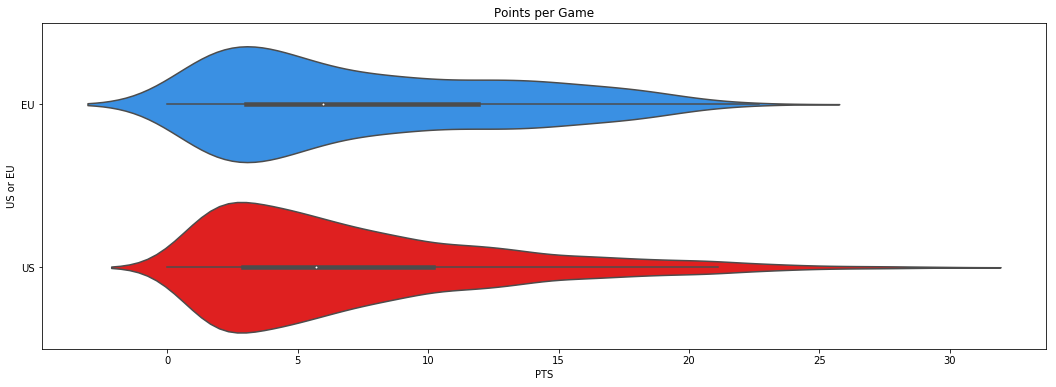

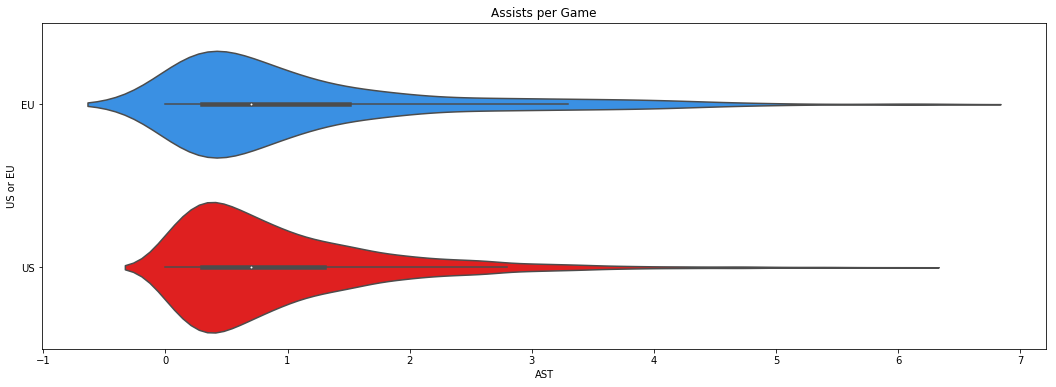

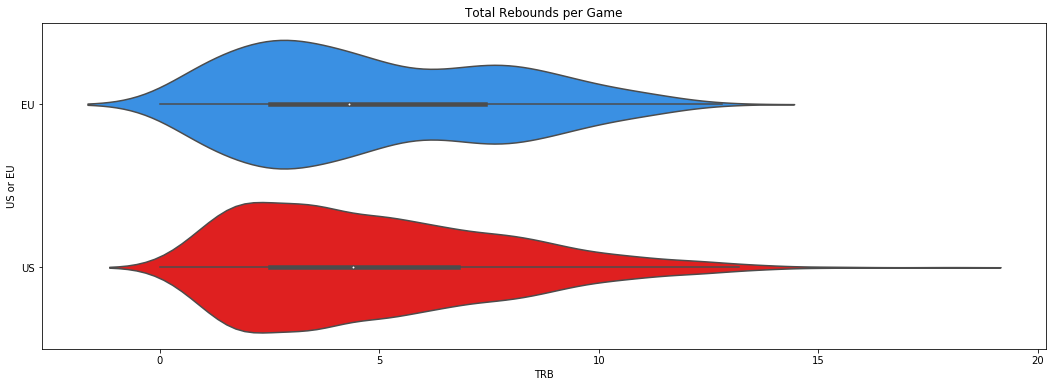

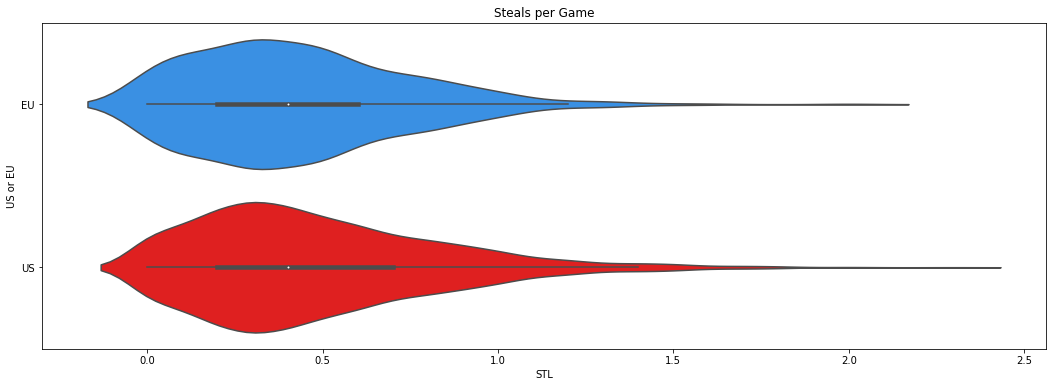

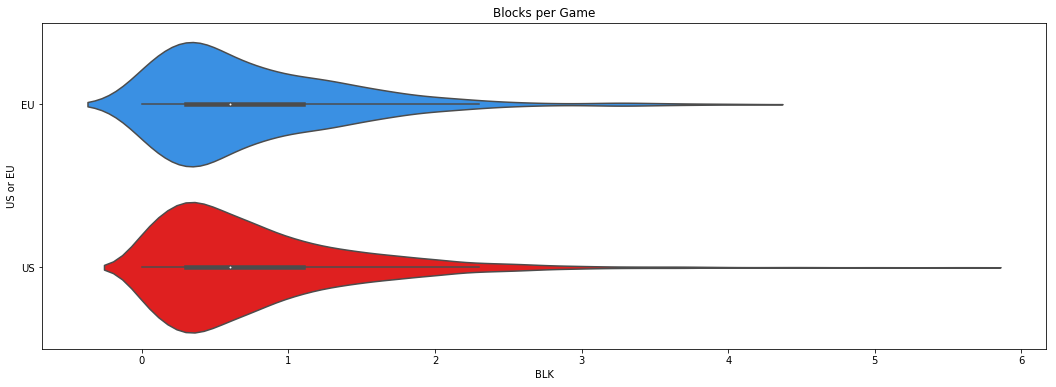

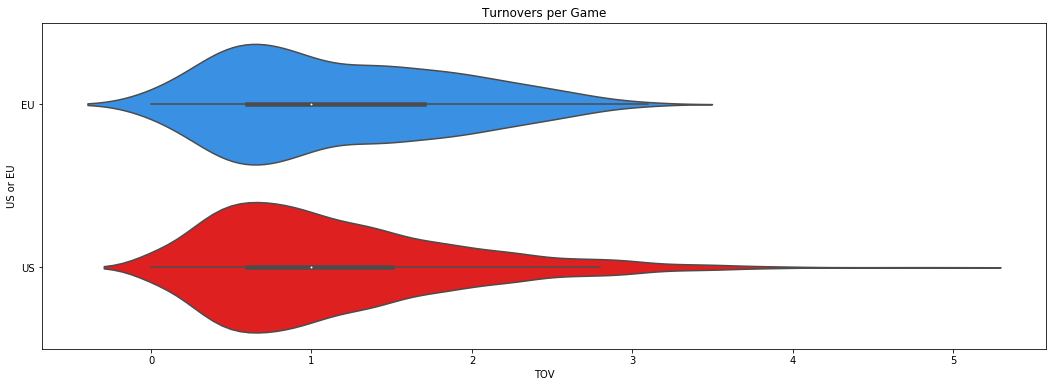

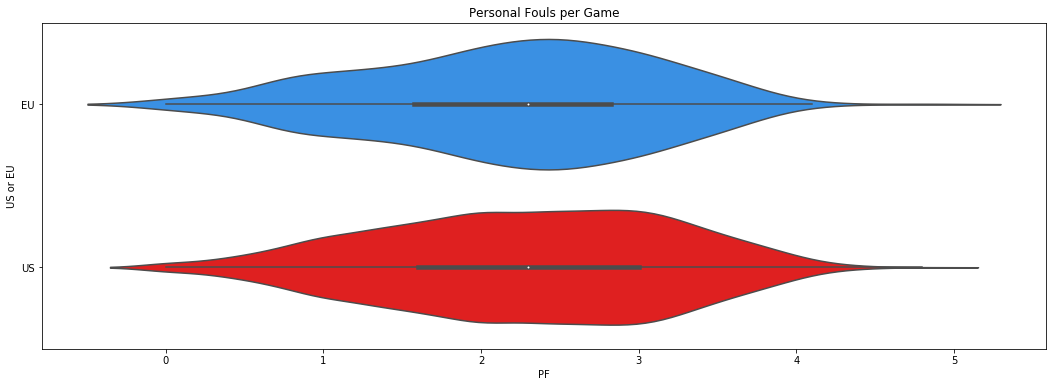

In [4]:
sns.violinplot(y="US or EU", x="PTS", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Points per Game")
plt.show()
sns.violinplot(y="US or EU", x="AST", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Assists per Game")
plt.show()
sns.violinplot(y="US or EU", x="TRB", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Total Rebounds per Game")
plt.show()
sns.violinplot(y="US or EU", x="STL", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Steals per Game")
plt.show()
sns.violinplot(y="US or EU", x="BLK", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Blocks per Game")
plt.show()
sns.violinplot(y="US or EU", x="TOV", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Turnovers per Game")
plt.show()
sns.violinplot(y="US or EU", x="PF", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Personal Fouls per Game")
plt.show()

Let's cover each violin plot one by one, keeping in mind that given the larger proportion of US players than EU players, outliers are potentially more likely.

With regards to Points per Game (PPG), both groups are very similarly matched with the median and the lower quartile being almost identical. However the EU players have a larger interquartile range, meaning that they are more evenly distributed with regards to how many points they earn. Furthermore the 95% confidence interval (CI) stretches further for the EU players. So while there are a few seasons where US players averaged between 27.5 and 33 PPG, the EU players (proportionally speaking), on average, tend to earn slightly more points per game. The difference is minimal however. Perhaps this is because for EU players to apply to the NBA draft, they have to be that much better than the other EU players to even consider it. This might explain the more flat distribution when compared to the US players, for whom the NBA is the natural choice when going pro and so you get alot more 'average to below average' players who, had they not been born in the US (with all other things being equal) might not have applied for the draft. 

The Assists violin plot showed a similar story. The distributions are almost identical with the upper quartile and the 95% CI higher for the EU centers, but as before, not by much. Again there are a few 'anomalies' in both categories stretching the violin to the right. This is perhaps contracy to the notion that 'European Big Men' are better passers.

The rest of the plots show a similar story with certain outliers pulling the violin one way or another,with the median and interquartile ranges almost indiscernible between groups of players. US centers turn the ball over (turnovers) slightly less than EU centers, however EU centers are slightly better rebounders. Seeing this begs the question if the there is any difference (statistically speaking) between EU and US centers, we will need to compute a hypothesis test later on, let's continue exploring our data for now though. We have not accounted for player age, which in my opinion must be one of the greatest determinants of most of the above statistics. Let's see if this is the case. 

## Is age a factor?

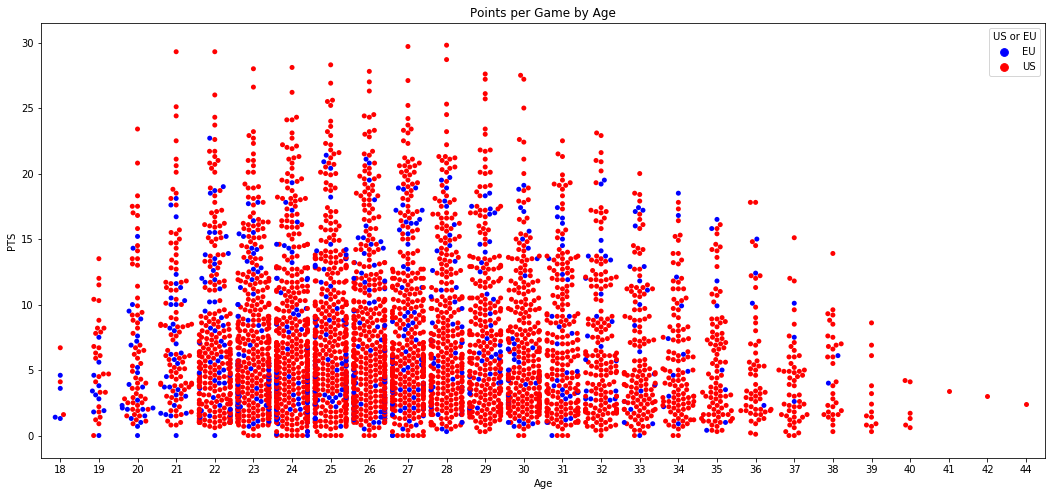

In [5]:
plt.rcParams["figure.figsize"] = [18,8]
sns.swarmplot(x="Age", y="PTS", data=player_data_df, hue="US or EU", palette={"US":"r", "EU":"b"})
plt.title("Points per Game by Age")
plt.show()

From the swarm plot above we can see a quadratic or perhaps even cubic relationships between Age and Points per Game (PTS). I'm surprised the relationship isn't more pronounced that this, however considering that the data is 'per Game' and not 'per x minutes', we cannot differentiate between a high usage low efficiency player and a low usage medium efficiency player for example. Although with this much data it's quite hard to see patters. Let's compute a column for 'points per 36 minutes' and plot a boxplot.

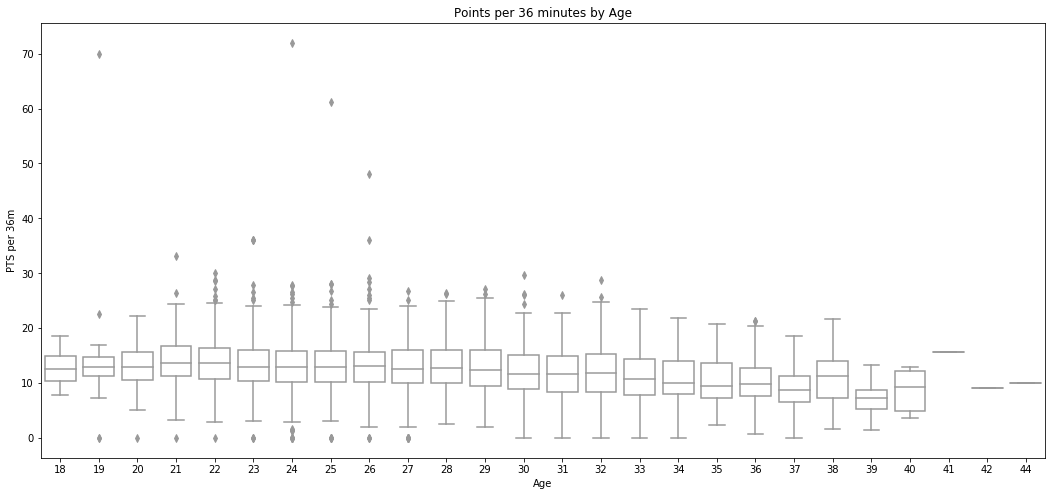

In [6]:
player_data_df["PTS per 36m"]=player_data_df["PTS"].divide(player_data_df["MP"])*36
sns.boxplot(x="Age", y="PTS per 36m", data=player_data_df, color="w")
plt.title("Points per 36 minutes by Age")
plt.show()

Woah! Immediately the outliers jump out. We will investigate these now, however in the context of this Capstone, individual outliers like these don't add much information. I suspect these are a result of instances where a player played very few matches with few minutes, but scored alot during those minutes.

In [7]:
print(player_data_df.loc[player_data_df["PTS per 36m"]>30, ["PTS per 36m", "PTS", "MP", "G"]])

      PTS per 36m  PTS   MP  G
511     69.882353  3.3  1.7  3
1304    72.000000  3.0  1.5  2
1702    48.000000  4.0  3.0  1
1749    36.000000  2.0  2.0  1
2295    36.000000  1.3  1.3  3
2375    33.157895  3.5  3.8  6
2704    36.000000  0.7  0.7  3
2973    61.200000  1.7  1.0  3
3243    36.000000  1.8  1.8  5


My suspision was correct, and considering the way the 'per 36 minute' metrics are calculated (*36) the potential error for extrapolating is demonstrated here. Let's have a look at the boxplots without these values.

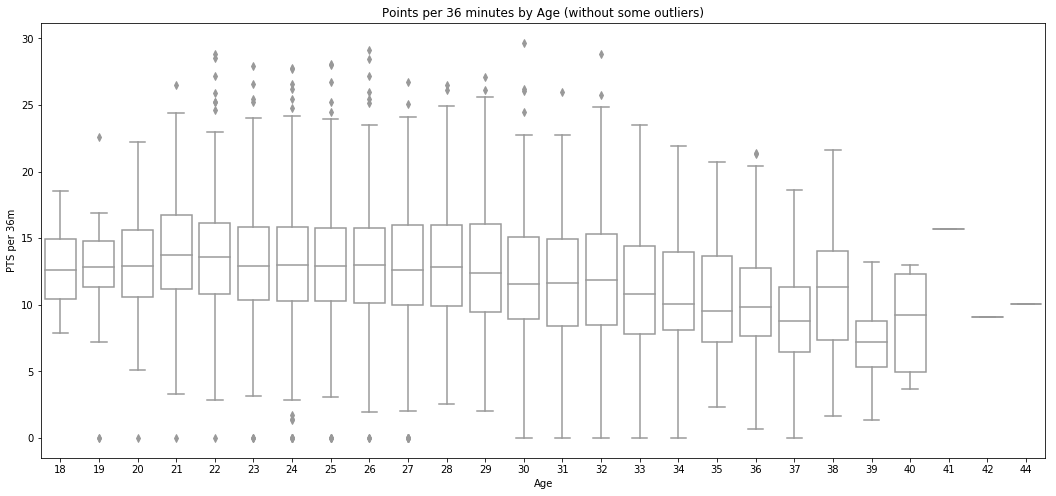

In [8]:
sns.boxplot(x="Age", y="PTS per 36m", data=player_data_df[player_data_df["PTS per 36m"]<30], color="w")
plt.title("Points per 36 minutes by Age (without some outliers)")
plt.show()

As we can see, the interquartile range remains somewhat constant, however the median drops gradually from the age of 28. Given the small sample size of NBA seasons where players were 38 or older, I'm not surprised to see that fluctuation in box plots. There are multiple factors determining the Points scored by a player (athleticism, experience etc etc) so it's hard to draw reliable conclusions from this plot, but it's a nice sanity check to see that player efficiency (in terms of points per 36m) does decline with age (even if not by as much as expected). 

We could perform a similar analysis on other statistics (such as Assists or Rebounds for example) and 'Age' in an attempt to spot correlations, however this would be an exhausting process, so instead we will plot a heat map. During the data wrangling steps, we did not deal with roughly 400 rows of data (these corresponded to un-drafted NBA player seasons). The heatmap will also allow us to get an idea of how relevant 'Draft Placing' is in determining other statistics. 

## Feature Analysis/Selection

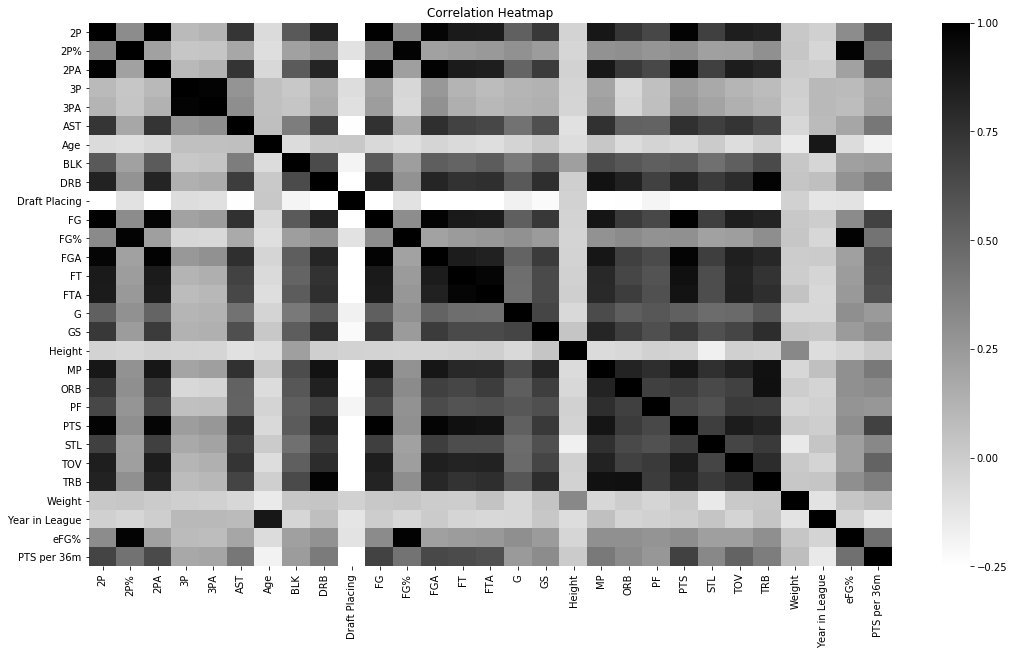

In [9]:
plt.rcParams["figure.figsize"] = [18,10]
sns.heatmap(data=player_data_df.corr(),
            cmap="binary", vmin=-0.25, vmax=1)
"""[["Draft Placing", "PTS", "AST", "BLK", "TRB","STL","TOV","PF","eFG%", "G", "GS", "MP"]]"""
plt.title("Correlation Heatmap")
plt.yticks(rotation=0)
plt.show()

Before going further in our analysis, we should get rid of unnecesary data. This is defined as data that produces little predictive power, or correlates with other columns of data that we found to be 'predictive' of statistics such as Points per Game (PTS column). These are columns such as: 2P% (2-point field goal percentage), Country or State, 2P, FT, Tm etc.

In [10]:
player_data_df_old=player_data_df # keeping a copy of the old dataset
player_data_df=player_data_df.iloc[:,[2,3,5,6,7,10,19,21,22,23,25,26,28,31]] # only keeping relevant columns

One of the first things that jumped out was that 'Draft Placing' was the only column to show weak negative correlation with every other column ( (-0.25,0) interval). Let's investigate why this is, surely 'Draft Placing' must have some relationship to statistics such as PTS.

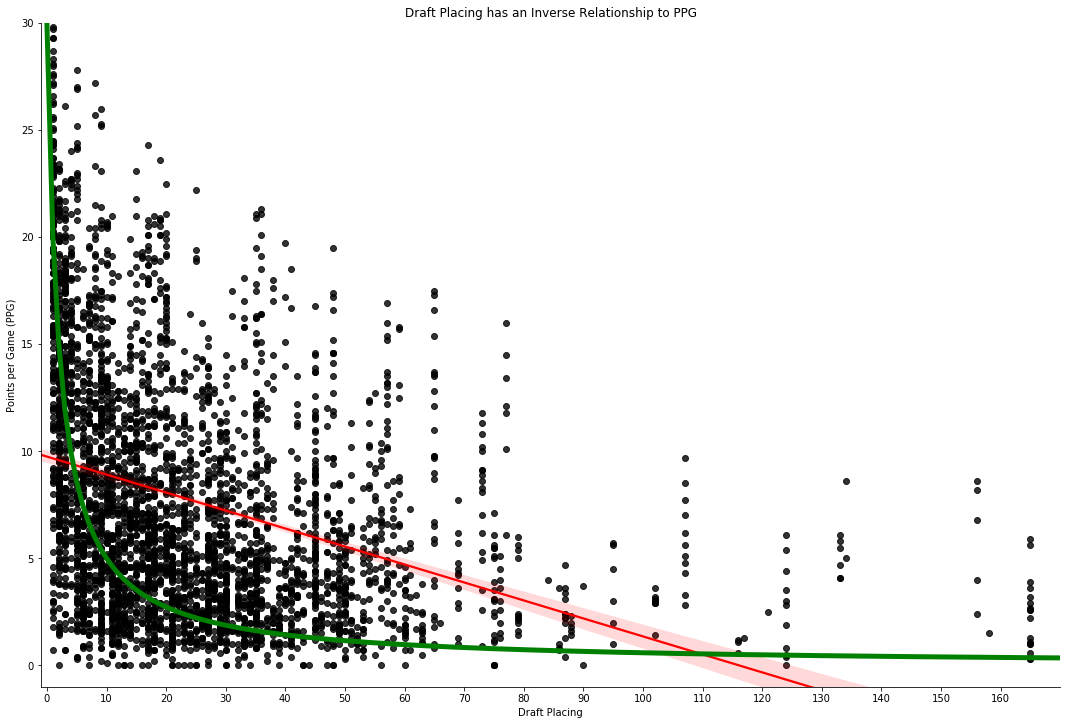

In [15]:
import numpy as np
sns.lmplot("Draft Placing", "PTS", data=player_data_df, size=10, aspect=1.5,scatter_kws={"color":"black"},line_kws={"color":"r"})
plt.plot([6/x for x in np.arange(0.2,20,0.1)], linewidth=5, color="green")
plt.title("Draft Placing has an Inverse Relationship to PPG")
plt.ylabel("Points per Game (PPG)")
plt.xticks([x for x in range (0,170,10)])
plt.xlim(-1,170)
plt.ylim(-1,30)
plt.show()

The scatter plot highlights a very important point, which is that, even though the correlation coefficient may be have a small absolute value (weak linear relationship) that does not mean that there is no relationship between 2 columns of data. In fact, as expected, 'Draft Placing' has a strong relationship to PPG, however this relationship is better described as 'inverse' than 'linear' as can be seen above. Hence, we cannot get rid of this 'high information' data column.
More generally this means we cannot conclusively disregard columns of data based on correlation coefficients, given that (as above) non-linear relationships exist and it wouldn't make sense to get rid of features with low correlation coefficients.
We saw that 'eFG%' column was another column that stood out across the heatmap in terms of the values of it's correlation coefficients, let's study it also.

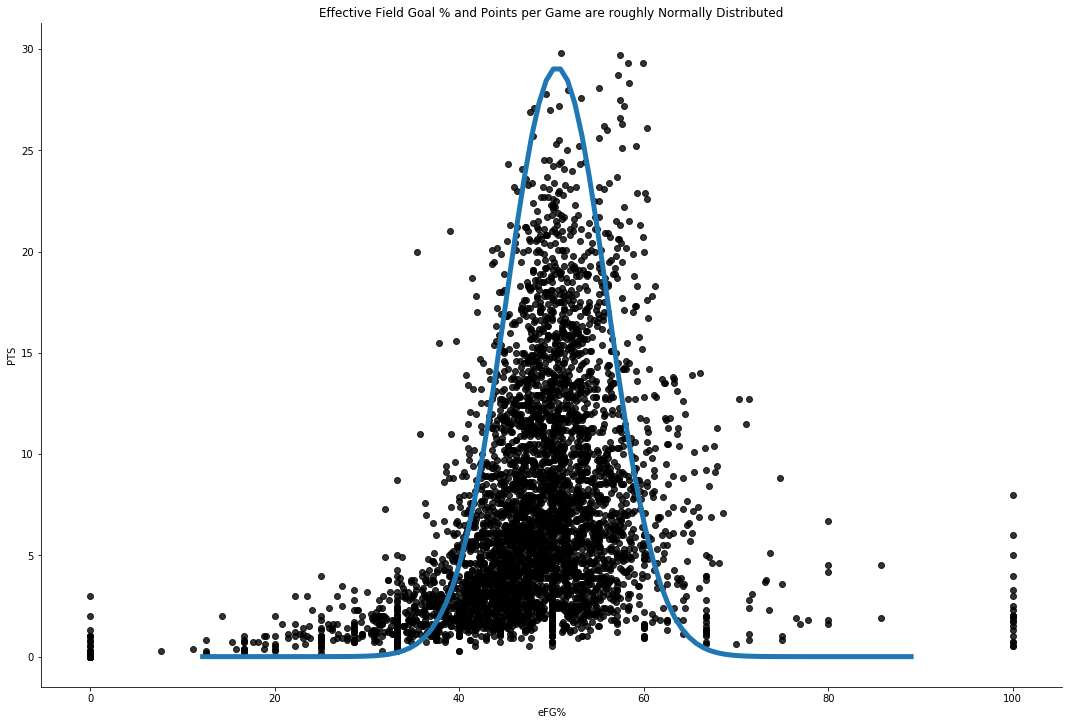

In [18]:
sns.lmplot(x="eFG%", y="PTS", data=player_data_df, size=10, aspect=1.5, scatter_kws={"color":"black"}, fit_reg=False)
plt.title("Effective Field Goal % and Points per Game are roughly Normally Distributed")
import math 
import matplotlib.mlab as mlab
mean = np.mean(player_data_df["eFG%"].values)+3
variance = np.var(player_data_df["eFG%"].values)
std = math.sqrt(variance)-5
x = np.linspace(mean - 7*std, mean + 7*std, 100)
plt.plot(x, 400*mlab.normpdf(x, mean, std), linewidth=5)
plt.show()

As with 'Draft Placing' there is a clear non-linear relationship that, by the looks of things, would be well described by a normal distribution. 

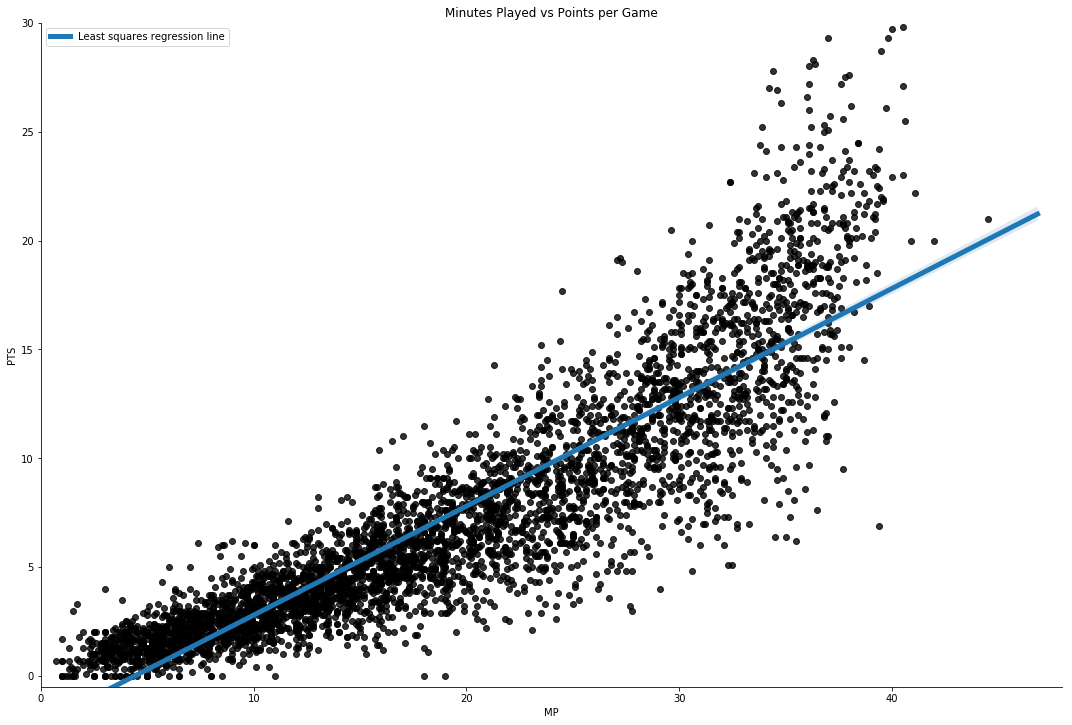

In [13]:
sns.lmplot(x="MP", y="PTS", data=player_data_df, size=10, aspect=1.5, scatter_kws={"color":"black"}, line_kws={"linewidth":5})
plt.title("Minutes Played vs Points per Game")
plt.axis([0,48,-0.5,30])
plt.legend(["Least squares regression line"], loc="upper left")
plt.show()

From the above it is clear that: Draft Placing, Effective Field Goal Percentage (eFG%) and Minutes Played are 3 features that we have to include in our linear model for PTS at least, and most likely others. I have a suspicion that, from the number of features perspective, these 3 features won't be enough to achieve linear models with sufficient accuracy, if so, then we can scrape more data. 
However, we will not know this until we actually build a model. Intuitively, the features noted above, in terms of the 'tangible stuff' (information  that can be recorded such as 'minutes played' as opposed to unobserved/unrecorded stuff like 'time spent training/working out'), are some of the most logical candidates for predicting the quality of a player.

## Hypothesis Testing

One of the main goals of this project is to compare US and EU centers playing in the NBA and compare their differences. However, there is a possibility (and the violin plots above certainly seem to agree) that there is no difference in the main statistical measures of US and EU players (PTS, AST, REB etc) and we will test this hypothesis here (assuming all the requirements for a Z-test are met). 

Intuitively speaking, since we have the data of ALL NBA centers since the 1979-1980 season, we are comparing populations (by definition) and as such, given that violin plots show the distribution of the data, we were able to make direct inferences about the differences of US and EU players. These are more powerful, as we were able to not only compare the medians and the quartiles, but the complete distribution, which could not be accounted for with simple summary statistics such as a median. Finally, there was no chance of us making any kind of error (similar to Type 1 or Type 2 errors in our hypothesis conclusions) since, again, we were dealing with population data. Nevertheless, conducting a hypothesis test will be a nice sanity check, especially so as it is supports one of the main (and perhaps controversial) findings of this capstone.

Null hypothesis: *the medians of: PTS, AST, BLK, PF, STL, TOV and TRB **are the same** for US and EU players.*

Alternate hypothesis: *the medians of: PTS, AST, BLK, PF, STL, TOV and TRB **are not the same** for US and EU players*

We set the significance level at 5% (alpha=0.05).

However, after quickly plotting a histogram for each of the above statistics, we saw that the data is not normally distributed, and so we violate the normality requirement of the Z-test, thus we cannot conduct a hypothesis test. **We are left to conclude (at least for the time being) that, statistically speaking, US and EU centers playing in the NBA are the same.**
